In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('Dataset_Abandon_Scolaire.csv')

# Exploration du dataset

In [3]:
df.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


DATA CLEANING

In [4]:
df.shape

(2000, 7)

In [5]:
df.isna().sum()

Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64

In [6]:
print("Types des colonnes dans le DataFrame:")
print(df.dtypes)

Types des colonnes dans le DataFrame:
Age                      int64
Sexe                    object
Taux_presence          float64
Nombre_retards           int64
Note_moyenne           float64
Situation_familiale     object
Abandon                  int64
dtype: object


In [7]:
# afficher valeurs uniques dans les colonnes de type object 'Sexe' et 'Situation_familiale'
print(f"SEXE : {df['Sexe'].unique()} et Situation_familiale :{df['Situation_familiale'].unique()}")

SEXE : ['Femme' 'Homme'] et Situation_familiale :['Enfants à charge' 'Célibataire' 'Marié' 'Divorcé']


In [8]:
# Convertir les colonnes 'Sexe' et 'Situation_familiale' en variables catégorielles
df['Sexe'] = df['Sexe'].map({'Femme': 0, 'Homme': 1})
df['Situation_familiale'] = df['Situation_familiale'].map({'Célibataire': 0, 
                                                           'Marié': 1, 'Divorcé': 2, 
                                                           'Enfants à charge': 3})
# verifier la conversion
print(f"SEXE : {df['Sexe'].unique()} et Situation_familiale :{df['Situation_familiale'].unique()}")

SEXE : [0 1] et Situation_familiale :[3 0 1 2]


# Exploration statistques

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   int64  
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   int64  
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 109.5 KB


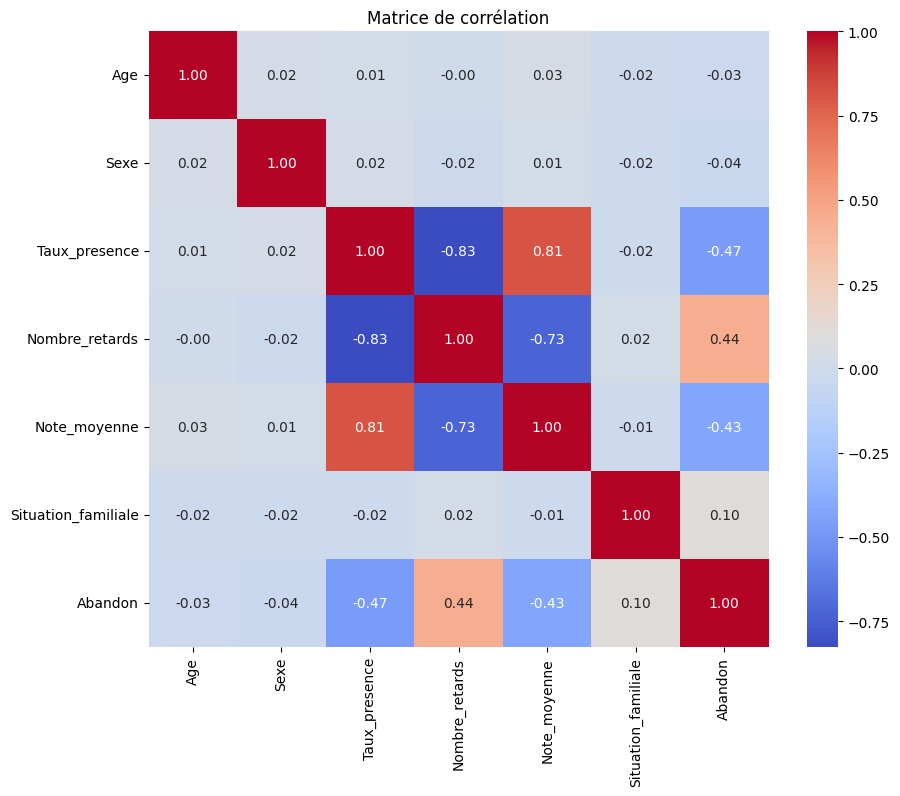

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

expliquation de la matrice de correlation : 
1) plus le taux_de_presence est elevé plus la moyenne sera elevée
2) plus le taux_de_presence est elevé mois l'eleve risque d'abondonner
3) retard elever ---> moyenne baisse 
etc .....

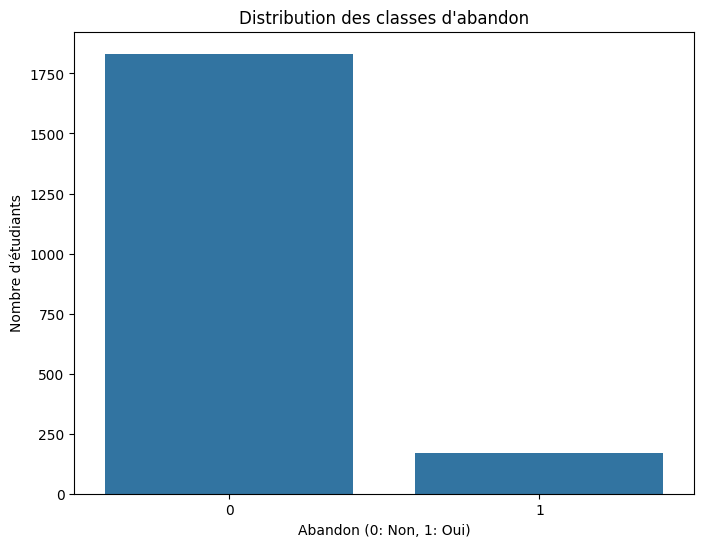

In [11]:
# Calculer et afficher la distribution des classes
class_dist = df["Abandon"].value_counts()
# Visualiser avec un graphique en barres
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Abandon"])
plt.title('Distribution des classes d\'abandon')
plt.xlabel('Abandon (0: Non, 1: Oui)')
plt.ylabel('Nombre d\'étudiants')
plt.show()

# Machine learning :

In [12]:
# features and Target
X = df.drop(columns='Abandon', axis = 1)
y = df['Abandon']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [14]:
# separer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=2)

In [15]:
print(X_train.shape, X_test.shape)

(1600, 6) (400, 6)


## KNN avec gridsearch


Meilleur k: 15
Meilleur score (accuracy): 0.7397191705974617
Accuracy du meilleur modèle KNN sur l'ensemble de test: 0.95
Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       366
           1       0.82      0.53      0.64        34

    accuracy                           0.95       400
   macro avg       0.89      0.76      0.81       400
weighted avg       0.95      0.95      0.95       400



c:\Users\skand\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


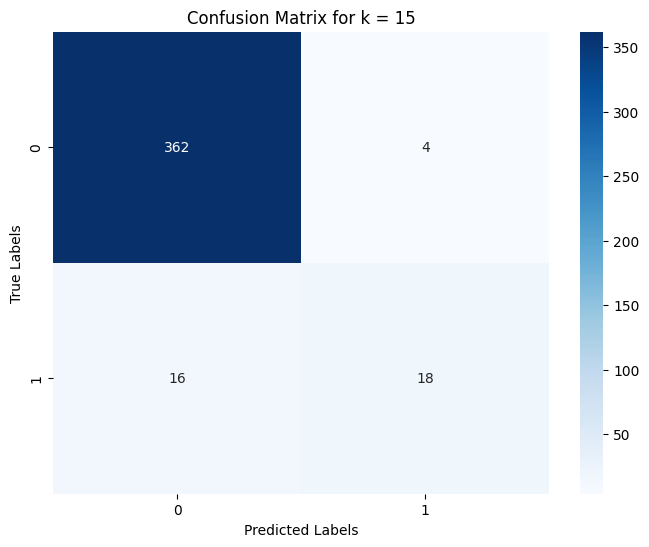

In [16]:
# Définir les paramètres à tester pour k
param_grid = {'n_neighbors': np.arange(1, 52,2)}

# Initialiser le modèle KNN
knn = KNeighborsClassifier()
# Initialiser GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="f1_macro") # cv=5 for 5-fold cross-validation

# Lancer la recherche des meilleurs paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print(f"Meilleur k: {grid_search.best_params_['n_neighbors']}")
print(f"Meilleur score (accuracy): {grid_search.best_score_}")

# Entraîner le modèle avec le meilleur k trouvé
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

# Prédire sur l'ensemble de test et évaluer le modèle
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du meilleur modèle KNN sur l'ensemble de test: {accuracy}")

# enregistrer le modèle
joblib.dump(best_knn, 'best_knn_model.pkl')
# Afficher le rapport de classification
print("Classification Report for KNN Model:")
print(classification_report(y_test, y_pred))

# Matrice de confusion pour k = 15
cm_15 = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_15, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for k = 15")
plt.show()


## Random Forest gridsearch


Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8081402244029123

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       366
           1       0.77      0.68      0.72        34

    accuracy                           0.95       400
   macro avg       0.87      0.83      0.85       400
weighted avg       0.95      0.95      0.95       400



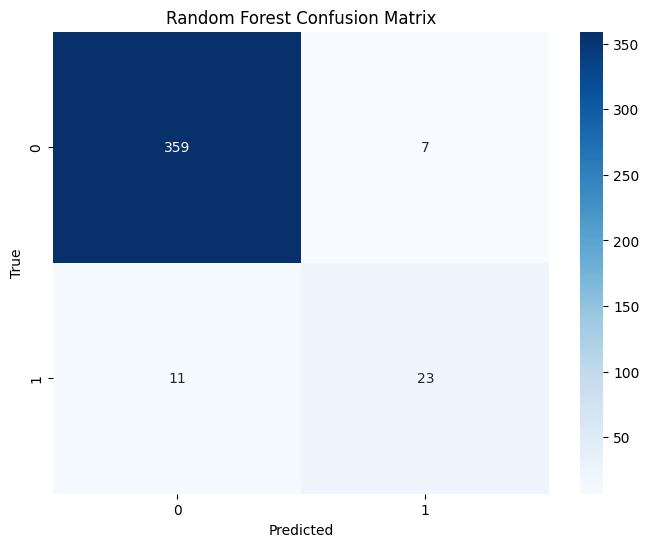

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, scoring='f1_macro', n_jobs=-1)


grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)

#enregistrer le modèle
joblib.dump(grid_search.best_estimator_, 'best_rf_model.pkl')

# Print results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

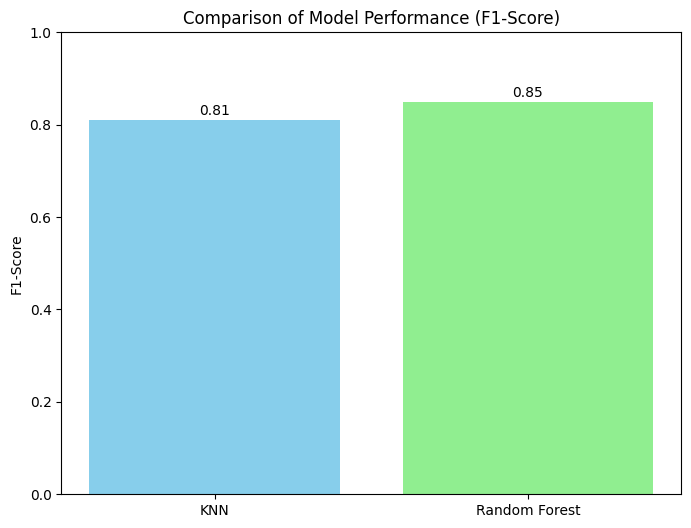

In [18]:
# Extract F1-scores from classification reports
models = ['KNN', 'Random Forest']
f1_scores = [0.81, 0.85]  # Based on the classification reports from previous cells

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Model Performance (F1-Score)')
plt.ylabel('F1-Score')
plt.ylim(0, 1)

# Add value labels on top of each bar
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

# Utilisation de la PCA

In [19]:
pca_object = PCA()
principal_component_problem = pca_object.fit_transform(X_scaled)
explained_variance = pca_object.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

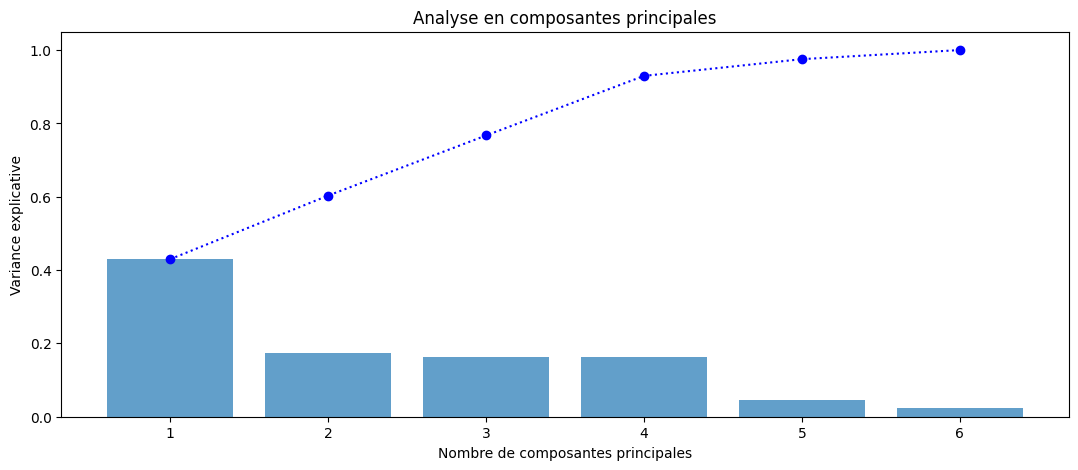

In [20]:
plt.figure(figsize=(13, 5))
plt.xticks(ticks=range(1, 21))
plt.bar(range(1,len(cumulative_variance) + 1), explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1), cumulative_variance, "bo:", label='cumulative_variance')
plt.title("Analyse en composantes principales")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance explicative")
plt.show()

D'après notre graphe :
> 4 premières composantes suffisent pour expliquer l'essentiel de la variance 95%, on peut donc réduire notre dataset 4 dimensions sans perte trop d'information

In [21]:
# Créer des données de test (10 étudiants fictifs)
test_data = pd.DataFrame({
    'Age': [20, 21, 22, 19, 23, 20, 21, 24, 19, 22],
    'Sexe': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # 0: Femme, 1: Homme
    'Taux_presence': [85.5, 65.2, 90.1, 75.3, 88.6, 92.4, 70.8, 83.2, 68.5, 95.1],
    'Nombre_retards': [2, 5, 1, 4, 2, 1, 6, 3, 5, 0],
    'Note_moyenne': [13.5, 10.2, 14.8, 11.5, 13.2, 15.1, 9.8, 12.5, 10.8, 16.2],
    'Situation_familiale': [0, 0, 1, 0, 2, 0, 0, 1, 0, 0]  # 0: Célibataire, 1: Marié, 2: Divorcé, 3: Enfants
})

# Standardiser les données avec le même scaler
loaded_scaler = joblib.load('scaler.pkl')
test_scaled = loaded_scaler.transform(test_data)
# charger le meilleur model rf 
best_rf_model = joblib.load('best_rf_model.pkl')

# Faire les prédictions
predictions = best_rf_model.predict(test_scaled)

# Ajouter les prédictions au DataFrame
test_data['Prediction_Abandon'] = predictions

# Afficher les résultats
print("\nRésultats des prédictions:")
print(test_data[['Age', 'Taux_presence', 'Nombre_retards', 'Note_moyenne', 'Prediction_Abandon']])
print("\n0: Pas d'abandon prévu")
print("1: Abandon prévu")


Résultats des prédictions:
   Age  Taux_presence  Nombre_retards  Note_moyenne  Prediction_Abandon
0   20           85.5               2          13.5                   0
1   21           65.2               5          10.2                   1
2   22           90.1               1          14.8                   0
3   19           75.3               4          11.5                   0
4   23           88.6               2          13.2                   0
5   20           92.4               1          15.1                   0
6   21           70.8               6           9.8                   1
7   24           83.2               3          12.5                   0
8   19           68.5               5          10.8                   1
9   22           95.1               0          16.2                   0

0: Pas d'abandon prévu
1: Abandon prévu
